# Classification using CountVec & Nltk

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn_evaluation.plot import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from keras.utils.np_utils import to_categorical
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import chi2


import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

pd.set_option('display.max_colwidth',100)

Using TensorFlow backend.
C:\Users\Nihar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nihar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nihar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nihar\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
news = pd.read_csv('News Aggregator/uci-news-aggregator.csv')
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather, should not slow taper",http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-c...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints at accelerated tapering,http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tape...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/i...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


In [4]:
news.count()

ID           422406
TITLE        422406
URL          422406
PUBLISHER    422404
CATEGORY     422406
STORY        422406
HOSTNAME     422406
TIMESTAMP    422406
dtype: int64

In [5]:
news.CATEGORY.value_counts()

e    152462
b    115964
t    108341
m     45639
Name: CATEGORY, dtype: int64

In [6]:
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather, should not slow taper",http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change in pace of tapering,http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-c...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints at accelerated tapering,http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tape...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles Plosser says",http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Growth,http://www.moneynews.com/Economy/federal-reserve-charles-plosser-weather-job-growth/2014/03/10/i...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


In [7]:
#Converting categories as balanced
num_of_categories = 45639
shuffled = news.reindex(np.random.permutation(news.index))
e = shuffled[shuffled['CATEGORY'] == 'e'][:num_of_categories]
b = shuffled[shuffled['CATEGORY'] == 'b'][:num_of_categories]
t = shuffled[shuffled['CATEGORY'] == 't'][:num_of_categories]
m = shuffled[shuffled['CATEGORY'] == 'm'][:num_of_categories]
concated = pd.concat([e,b,t,m], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['LABEL'] = 0

concated.loc[concated['CATEGORY'] == 'e', 'LABEL'] = 0
concated.loc[concated['CATEGORY'] == 'b', 'LABEL'] = 1
concated.loc[concated['CATEGORY'] == 't', 'LABEL'] = 2
concated.loc[concated['CATEGORY'] == 'm', 'LABEL'] = 3
print(concated['LABEL'][:10])
labels = to_categorical(concated['LABEL'], num_classes=4)
print(labels[:10])
if 'CATEGORY' in concated.keys():
      concated.drop(['CATEGORY'], axis=1)

163500    3
146287    3
91152     1
157594    3
137530    3
113606    2
97359     2
1294      0
59976     1
81480     1
Name: LABEL, dtype: int64
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [8]:
concated.CATEGORY.value_counts()

b    45639
m    45639
t    45639
e    45639
Name: CATEGORY, dtype: int64

In [9]:
# remove duplicates
concated = concated.drop_duplicates()
concated.isnull().sum()

ID           0
TITLE        0
URL          0
PUBLISHER    1
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
LABEL        0
dtype: int64

In [10]:
concated.count()

ID           182556
TITLE        182556
URL          182556
PUBLISHER    182555
CATEGORY     182556
STORY        182556
HOSTNAME     182556
TIMESTAMP    182556
LABEL        182556
dtype: int64

In [11]:
concated['CATEGORY'].unique() # unique category labels

array(['m', 'b', 't', 'e'], dtype=object)

In [12]:
concated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182556 entries, 163500 to 90285
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         182556 non-null  int64  
 1   TITLE      182556 non-null  object 
 2   URL        182556 non-null  object 
 3   PUBLISHER  182555 non-null  object 
 4   CATEGORY   182556 non-null  object 
 5   STORY      182556 non-null  object 
 6   HOSTNAME   182556 non-null  object 
 7   TIMESTAMP  182556 non-null  float64
 8   LABEL      182556 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 13.9+ MB


In [13]:
concated['text'] = concated.TITLE + " " + concated.PUBLISHER
concated.info()
#df.text.to_string()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182556 entries, 163500 to 90285
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         182556 non-null  int64  
 1   TITLE      182556 non-null  object 
 2   URL        182556 non-null  object 
 3   PUBLISHER  182555 non-null  object 
 4   CATEGORY   182556 non-null  object 
 5   STORY      182556 non-null  object 
 6   HOSTNAME   182556 non-null  object 
 7   TIMESTAMP  182556 non-null  float64
 8   LABEL      182556 non-null  int64  
 9   text       182555 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [14]:
# Drop null
concated= concated.dropna(subset=['text'])

In [15]:
concated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182555 entries, 163500 to 90285
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         182555 non-null  int64  
 1   TITLE      182555 non-null  object 
 2   URL        182555 non-null  object 
 3   PUBLISHER  182555 non-null  object 
 4   CATEGORY   182555 non-null  object 
 5   STORY      182555 non-null  object 
 6   HOSTNAME   182555 non-null  object 
 7   TIMESTAMP  182555 non-null  float64
 8   LABEL      182555 non-null  int64  
 9   text       182555 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.3+ MB


In [16]:
concated.text.iloc[86]

"'Guardians of the Galaxy' Screening: Chris Pratt, Zoe Saldana, Vin Diesel Hit  ... Hollywood Reporter \\(blog\\)"

In [17]:
concated['text'].dropna(inplace=True)

In [18]:
concated.text.iloc[86]

"'Guardians of the Galaxy' Screening: Chris Pratt, Zoe Saldana, Vin Diesel Hit  ... Hollywood Reporter \\(blog\\)"

In [19]:
symbols = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', 
           ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', 
           '#', '*', '+', '\\', '•',  '~', '@', '£', '·', '_', 
           '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', 
           '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', 
           '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', 
           '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', 
           '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', 
           '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', 
           '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', 
           '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', 
           '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
           '¹', '≤', '‡', '√', ]

In [20]:
def clean_symbol(text):
    text = str(text)
    for symbol in symbols:
        text = text.replace(symbol, ' ')
    return text

# remove symbols and punctuations 
concated['text'] = concated['text'].apply(lambda x: clean_symbol(x))

In [21]:
concated['text']  = concated['text'] .str.replace('[^\w\s]',' ')# unpunctuate

In [22]:
# Dictionary of short form words and mispellings
short_forms_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                    "'cause": "because", "could've": "could have", "couldn't": "could not", 
                    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                    "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                    "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                    "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
                    "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                    "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                    "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                    "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                    "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                    "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                    "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                    "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                    "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", 
                    "that's": "that is", "there'd": "there would", "there'd've": "there would have", 
                    "there's": "there is", "here's": "here is","they'd": "they would", 
                    "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", 
                    "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", 
                    "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                    "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", 
                    "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
                    "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                    "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                    "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
                    "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
                    "you're": "you are", "you've": "you have"}

In [23]:
def clean_shortforms(text):
    clean_text = text
    for shortform in short_forms_dict.keys():
        if re.search(shortform, text):
            clean_text = re.sub(shortform, short_forms_dict[shortform], text)
    return clean_text

# fix short forms
concated['text'] = concated['text'].apply(lambda x: clean_shortforms(x))

In [24]:
import re
import string

def clean_text(text):
    text = re.sub("[0-9]+"," ",text)
    text = text.lower() # lowercase text
    text = re.sub(' +',' ', text)
    tokens = re.split('\W+',text)
    text1 = " ".join([word for word in tokens if word not in stop_words and word not in string.punctuation])
    return text1

In [25]:
concated['cleaned_text'] = concated['text'].apply(lambda x:clean_text(x))

In [26]:
concated.head(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,LABEL,text,cleaned_text
163500,49923,AG announces settlement with Four Loko drink maker,http://www.pennlive.com/midstate/index.ssf/2014/03/ag_announces_settlement_with_f.html,Penn Live,m,dvGuDQsYC8aoIAMrOF-hiKWVKak1M,www.pennlive.com,1.395890e+12,3,AG announces settlement with Four Loko drink maker Penn Live,ag announces settlement four loko drink maker penn live
146287,203360,Hurricanes Katrina and Rita Could Explain Half of New Orleans Stillbirths,http://www.natureworldnews.com/articles/6981/20140509/hurricanes-katrina-and-rita-could-explain-...,Nature World News,m,daoAEXlTICmkw_MBBmqjoFWNKob6M,www.natureworldnews.com,1.399710e+12,3,Hurricanes Katrina and Rita Could Explain Half of New Orleans Stillbirths Nature World News,hurricanes katrina rita could explain half new orleans stillbirths nature world news
91152,25084,Oracle slides as Q3 profit and sales miss estimates amid stiff rivalry,http://www.proactiveinvestors.com/companies/news/52850/oracle-slides-as-q3-profit-and-sales-miss...,Proactive Investors USA \& Canada,b,do8j0bCjY5DibxMZlDgqqxkTdZnyM,www.proactiveinvestors.com,1.395320e+12,1,Oracle slides as Q3 profit and sales miss estimates amid stiff rivalry Proactive Investors USA ...,oracle slides q profit sales miss estimates amid stiff rivalry proactive investors usa canada
157594,422342,MC Mosquito Commission will be spraying in Ocean tonight,http://thelinknews.net/2014/08/26/mc-mosquito-commission-will-be-spraying-in-ocean-tonight/,The Link News,m,dqd7IwGtzHFAWvMr9ovUpSjN90jdM,thelinknews.net,1.409230e+12,3,MC Mosquito Commission will be spraying in Ocean tonight The Link News,mc mosquito commission spraying ocean tonight link news
137530,184093,Where is the best place to be a mom? Scandinavia.,http://www.washingtonpost.com/news/parenting/wp/2014/05/05/where-is-the-best-place-to-be-a-mom-s...,Washington Post,m,d8CZPZV9F6L8IOM0FMj43cRImSmRM,www.washingtonpost.com,1.399390e+12,3,Where is the best place to be a mom Scandinavia Washington Post,best place mom scandinavia washington post


In [27]:
import re
import string

def clean_text1(text):
    text = string.capwords(text, sep = None) 
    tokens=re.split('\W+',text)
    tokens = list(set(tokens))
    text1 = " ".join([lemmatizer.lemmatize(word) for word in tokens if (len(word) >= 2 and len(word) < 14)])
    return text1

In [28]:
concated['cleaned_text'] = concated['cleaned_text'].apply(lambda x:clean_text1(x))

In [29]:
concated['cleaned_text'] 

163500                                        Four Penn Live Announces Loko Settlement Ag Drink Maker
146287           New World Explain Nature Hurricanes News Could Rita Katrina Half Orleans Stillbirths
91152     Profit Estimates Amid Investors Canada Slides Miss Stiff Usa Sales Oracle Rivalry Proactive
157594                                        Commission Ocean Mosquito Spraying Tonight News Mc Link
137530                                                     Scandinavia Best Washington Mom Post Place
                                                     ...                                             
69376                                      New Goldman Sachs Cfo News Sky Twitter Executive Australia
102941                                                       Samsung Galaxy Hands Tv Review Tab Stuff
69069                                                 United Natural Mln Fine Rtt News Tony Buy Foods
114448                                 Wall Google Journal City Blog Street Fiber 

In [30]:
titles = concated['cleaned_text']
labels = concated['LABEL']

In [31]:
titles

163500                                        Four Penn Live Announces Loko Settlement Ag Drink Maker
146287           New World Explain Nature Hurricanes News Could Rita Katrina Half Orleans Stillbirths
91152     Profit Estimates Amid Investors Canada Slides Miss Stiff Usa Sales Oracle Rivalry Proactive
157594                                        Commission Ocean Mosquito Spraying Tonight News Mc Link
137530                                                     Scandinavia Best Washington Mom Post Place
                                                     ...                                             
69376                                      New Goldman Sachs Cfo News Sky Twitter Executive Australia
102941                                                       Samsung Galaxy Hands Tv Review Tab Stuff
69069                                                 United Natural Mln Fine Rtt News Tony Buy Foods
114448                                 Wall Google Journal City Blog Street Fiber 

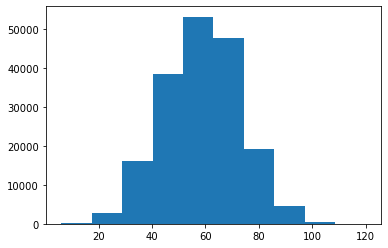

In [32]:
plt.hist([len(x) for x in titles])
plt.show()

In [33]:
def track_vocab(sentences, verbose =  True):
    
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
                
    return vocab

In [34]:
# tokenize all titles in the data
titles_token = titles.apply(lambda x: x.split())

In [35]:
# count the occurrence of all words in the data
vocab_count = track_vocab(titles_token)
print(len(vocab_count))
print({k: vocab_count[k] for k in list(vocab_count)[:10]})

39898
{'Four': 557, 'Penn': 61, 'Live': 1702, 'Announces': 982, 'Loko': 63, 'Settlement': 360, 'Ag': 90, 'Drink': 207, 'Maker': 523, 'New': 12272}


In [36]:
titles_token

163500                                      [Four, Penn, Live, Announces, Loko, Settlement, Ag, Drink, Maker]
146287      [New, World, Explain, Nature, Hurricanes, News, Could, Rita, Katrina, Half, Orleans, Stillbirths]
91152     [Profit, Estimates, Amid, Investors, Canada, Slides, Miss, Stiff, Usa, Sales, Oracle, Rivalry, P...
157594                                       [Commission, Ocean, Mosquito, Spraying, Tonight, News, Mc, Link]
137530                                                      [Scandinavia, Best, Washington, Mom, Post, Place]
                                                         ...                                                 
69376                                    [New, Goldman, Sachs, Cfo, News, Sky, Twitter, Executive, Australia]
102941                                                       [Samsung, Galaxy, Hands, Tv, Review, Tab, Stuff]
69069                                               [United, Natural, Mln, Fine, Rtt, News, Tony, Buy, Foods]
114448    

In [37]:
#X_train, X_test, y_train, y_test = train_test_split(titles, labels, test_size=0.3,shuffle=True) # 30% split

Models

Preliminary Naive Bayes Approach

In [38]:
count_vect = CountVectorizer(ngram_range = (1,3),min_df = 10,max_df = 1.)

#X_train_features = count_vect.fit_transform(X_train)
#print(X_train_features.shape)

#X_test_features = count_vect.transform(X_test)
#print(X_test_features.shape)

X = count_vect.fit_transform(titles)
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True) # 30% split

In [39]:
# fit and score the bayesian classifier
mnb = MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

y_pred_test=mnb.predict(X_test)
a=accuracy_score(y_pred_test, y_test)*100
print ('Test Accuracy',a)

y_pred_train=mnb.predict(X_train)
b=accuracy_score(y_train, y_pred_train)*100

print ('Train Accuracy',b)

results_mnb_cv = cross_val_score(mnb, X_train, y_train, cv=10)
print('Cross Validation Accuracy',results_mnb_cv.mean()*100)

Test Accuracy 91.47928021692093
Train Accuracy 92.80764701048999
Cross Validation Accuracy 91.65730876563154


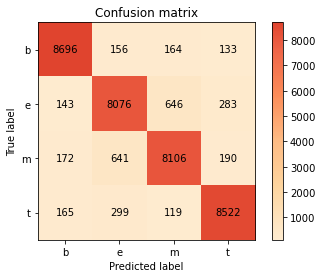

In [40]:
# Test Confusion Matrix
confusion_matrix(y_test, y_pred_test, target_names = ['b','e','m','t']).grid(False)

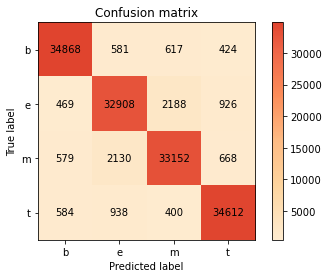

In [41]:
# Train Confusion Matrix
confusion_matrix(y_train, y_pred_train, target_names = ['b','e','m','t']).grid(False)

In [42]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9149
           1       0.88      0.88      0.88      9148
           2       0.90      0.89      0.89      9109
           3       0.93      0.94      0.93      9105

    accuracy                           0.91     36511
   macro avg       0.91      0.91      0.91     36511
weighted avg       0.91      0.91      0.91     36511



Logistic Regression

In [43]:
%%time
# First create the base model to tune
logreg = LogisticRegression(n_jobs=-1,solver='lbfgs',penalty='l2',multi_class='multinomial',class_weight=None)

# Fit the random search model
logreg.fit(X_train, y_train)

Wall time: 39.5 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred_log_test = logreg.predict(X_test)
e=accuracy_score(y_pred_log_test, y_test)*100
print ('Test Accuracy',e)

Test Accuracy 93.45128865273479


In [45]:
y_pred_log_train = logreg.predict(X_train)
f=accuracy_score(y_pred_log_train, y_train)*100
print ('Train Accuracy',f)

Train Accuracy 97.52403385281148


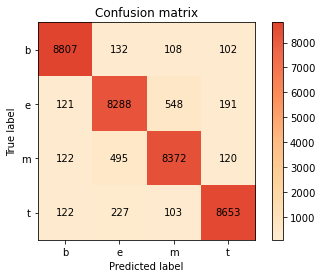

In [46]:
# Test Confusion Matrix
confusion_matrix(y_test, y_pred_log_test, target_names = ['b','e','m','t']).grid(False)

In [47]:
print(classification_report(y_test, y_pred_log_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9149
           1       0.91      0.91      0.91      9148
           2       0.92      0.92      0.92      9109
           3       0.95      0.95      0.95      9105

    accuracy                           0.93     36511
   macro avg       0.93      0.93      0.93     36511
weighted avg       0.93      0.93      0.93     36511



SGD Classifier

In [48]:
sgd_search = SGDClassifier(n_jobs=-1, max_iter=50,alpha=0.0001,class_weight='balanced')
sgd_search.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
c=accuracy_score(y_test, sgd_search.predict(X_test))*100
print ('Test Accuracy',c)

d=accuracy_score(y_train, sgd_search.predict(X_train))*100
print ('Train Accuracy',d)

results_sgd_cv = cross_val_score(sgd_search, X_train, y_train, cv=10)
print('Cross Validation Accuracy',results_sgd_cv.mean()*100)

Test Accuracy 93.49784996302483
Train Accuracy 95.24595327435567
Cross Validation Accuracy 93.61356720303142


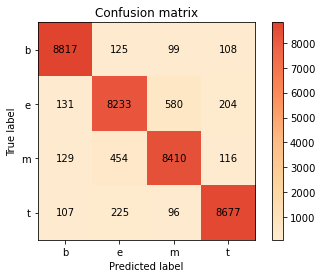

In [50]:
# Test Confusion Matrix
confusion_matrix(y_test, sgd_search.predict(X_test), target_names = ['b','e','m','t']).grid(False)

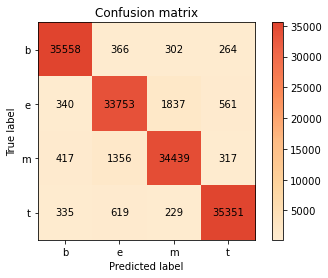

In [51]:
# Train Confusion Matrix
confusion_matrix(y_train, sgd_search.predict(X_train), target_names = ['b','e','m','t']).grid(False)

In [52]:
print(classification_report(y_test,sgd_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9149
           1       0.91      0.90      0.91      9148
           2       0.92      0.92      0.92      9109
           3       0.95      0.95      0.95      9105

    accuracy                           0.93     36511
   macro avg       0.93      0.93      0.93     36511
weighted avg       0.93      0.93      0.93     36511



In [53]:
#b= y_test + " " + sgd_search.predict(X_test) + " "

In [54]:
#b.to_csv('labelcv.csv')

In [55]:
#X_test

In [56]:
#X_test.to_csv('textcv.csv')

In [57]:
from sklearn import metrics

bac=balanced_accuracy_score(y_test,sgd_search.predict(X_test))*100
c_k_s=cohen_kappa_score(y_test,sgd_search.predict(X_test))*100
mc=matthews_corrcoef(y_test,sgd_search.predict(X_test))*100

print(c_k_s)
print(mc)
print(bac)

91.33047700780604
91.3313595465568
93.49863966639163
